# Импортируем библиотеки

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

# Синтетические данные

## Создаём данные

Т.к. в задании сказано мерить AUC, то речь должна идти о бинарной классификации. Т.к. мы хотим перебирать число признаков как параметр, то создаём данные, в которых 10 признаков, информативными являются только 4

In [41]:
X, y = make_classification(n_samples=2000, n_features=10, n_informative=4, n_classes=3, random_state=42)

In [42]:
data = pd.DataFrame(np.concatenate((X, y.reshape(2000, 1)), axis=1), 
                    columns=['x', '0', '1', '2', '3', '4', '5', '6', '7', '8', 'y'], dtype=float)
data.head()

,x,0,1,2,3,4,5,6,7,8,y
0,-1.765310,-1.024146,-0.080752,-1.371603,-1.693012,1.203602,0.485726,-0.805957,-2.294698,-0.872444,0.0
1,-0.858258,0.148367,-0.676983,-2.565923,-2.296268,-0.160094,1.177521,-0.901972,-0.488819,-2.252863,0.0
2,-1.070693,-1.402868,-1.964698,-2.615374,-1.870387,-0.723574,-0.190782,-3.305596,1.029794,-2.143583,0.0
3,0.330069,2.002894,-1.453344,0.084383,0.248392,-0.676807,-1.160034,0.004808,0.935594,-0.138064,1.0
4,1.427064,0.000755,0.745855,0.588909,1.038847,-0.383004,-1.143316,-0.207470,1.574944,0.663299,1.0


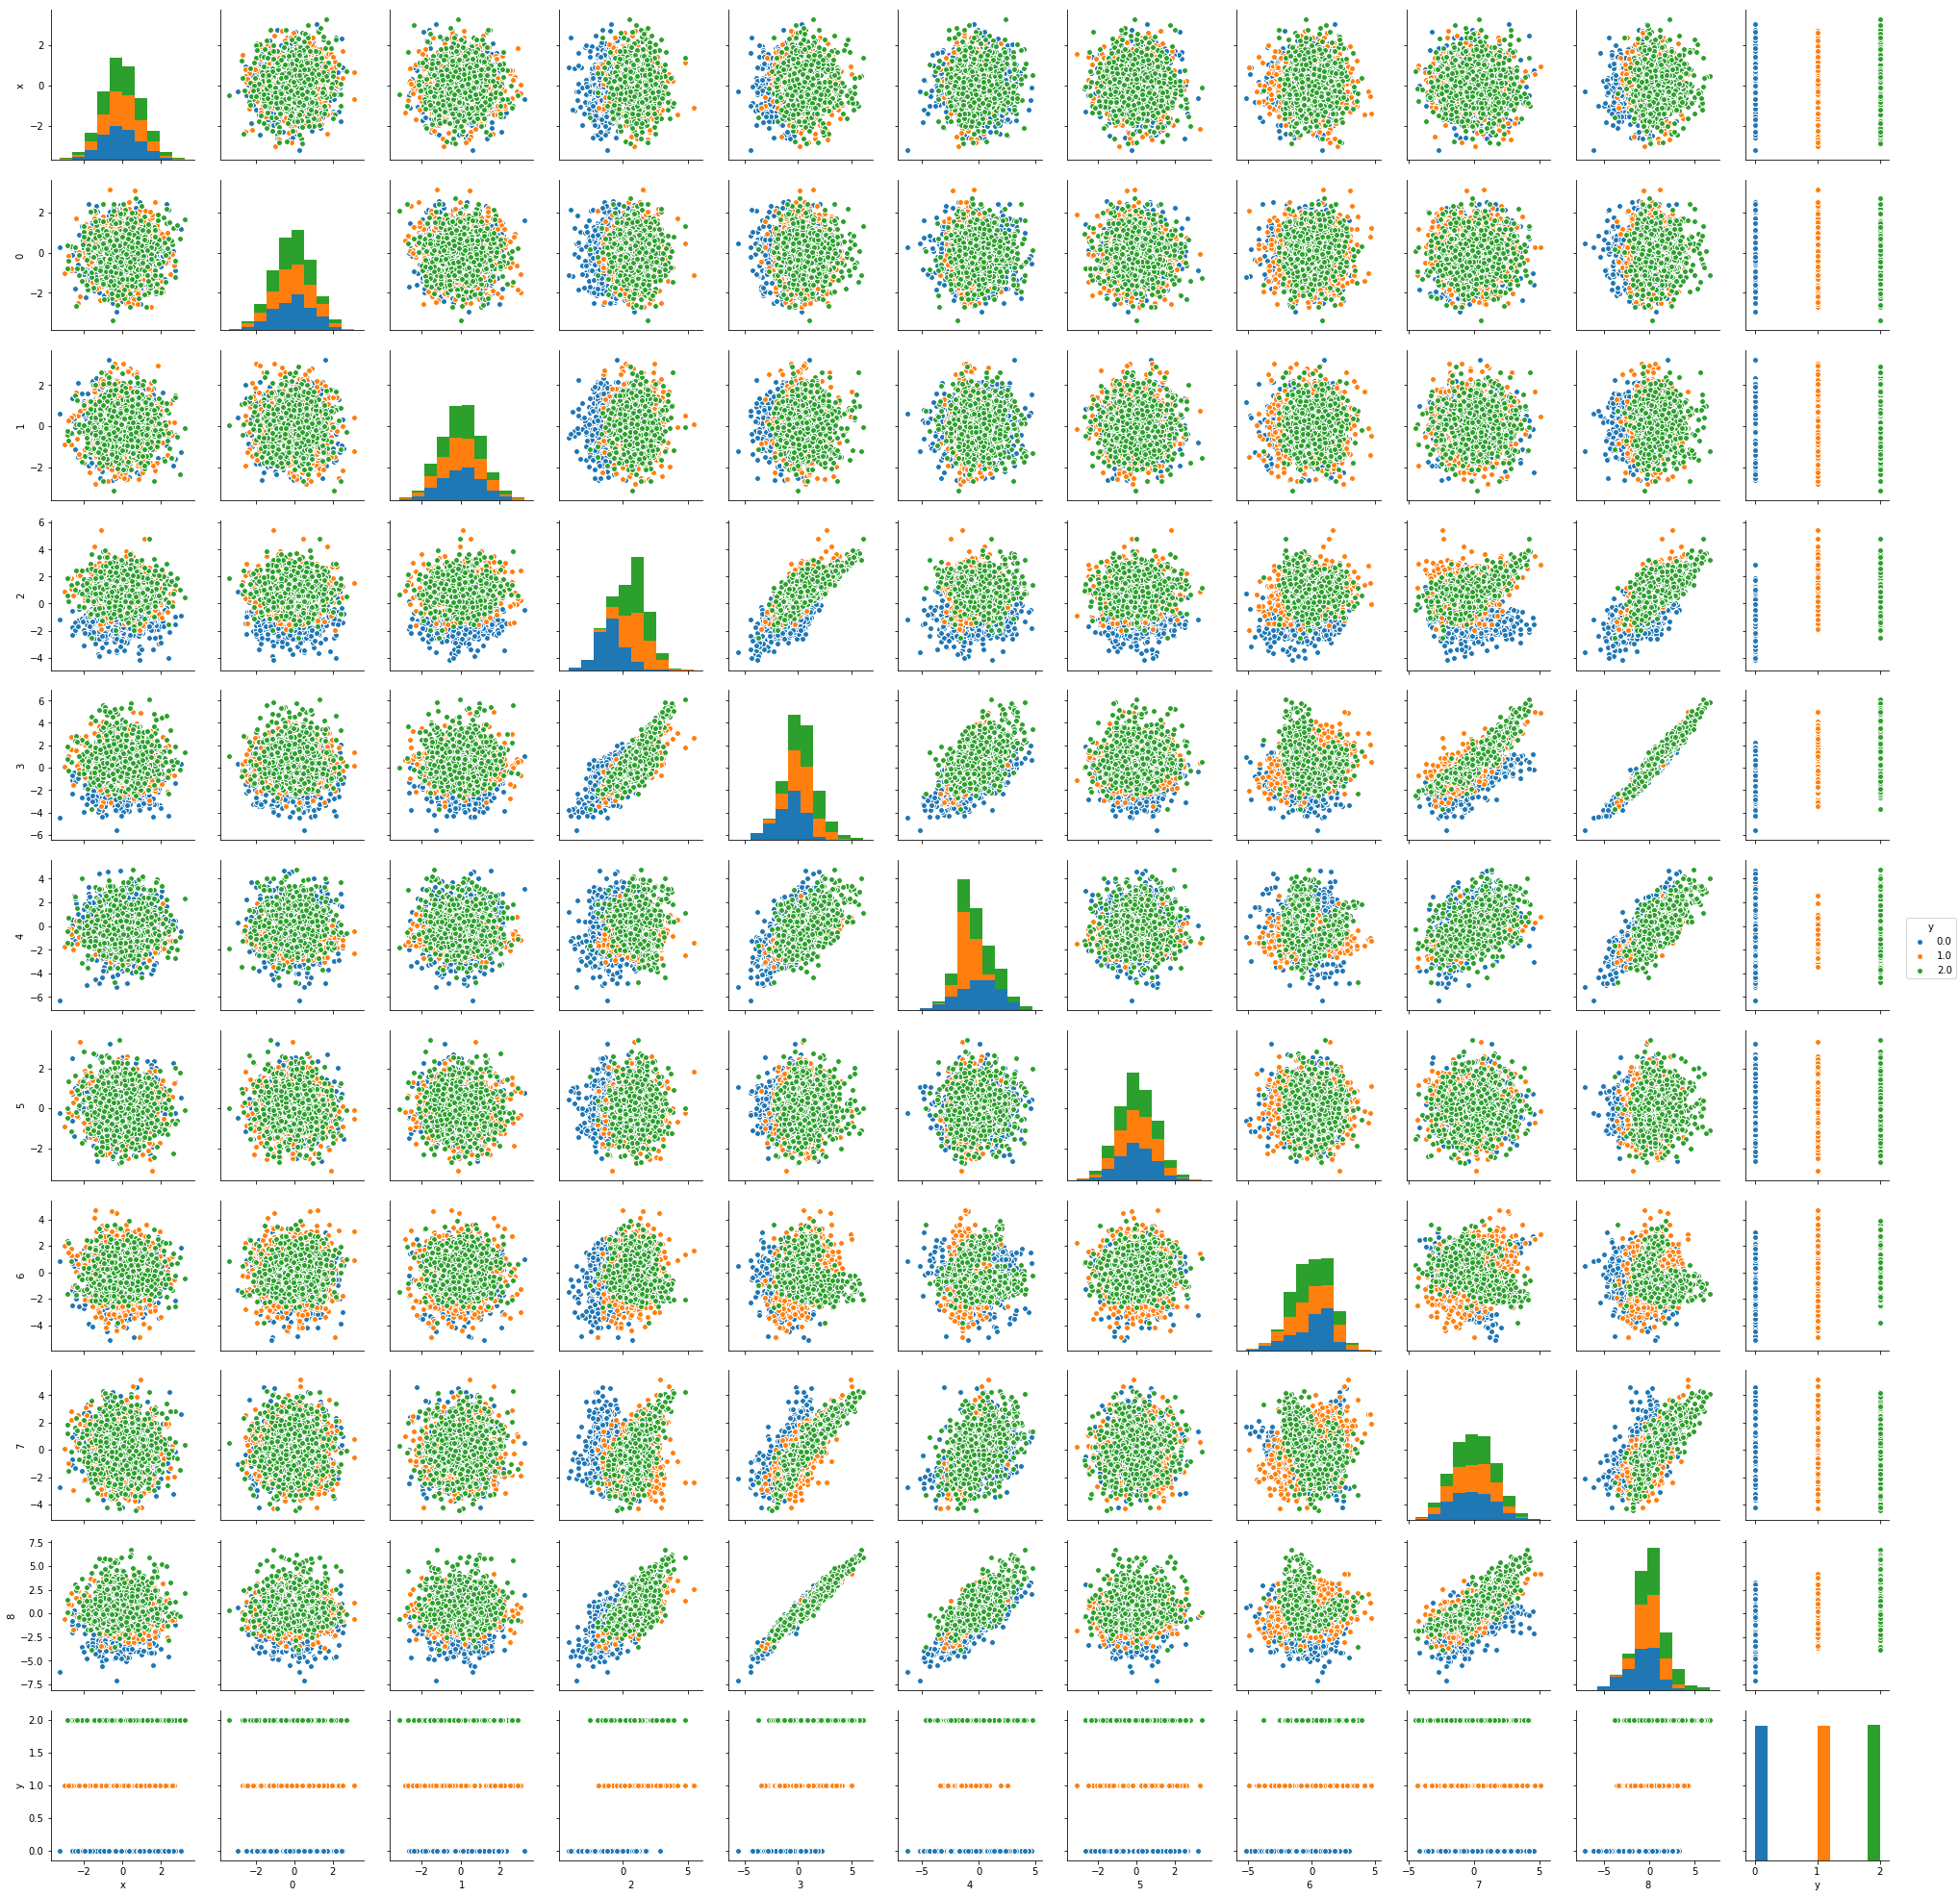

In [43]:
sns.pairplot(data, hue='y')

## Анализ выбросов

In [44]:
class2 = data[data.y == 2]
class1 = data[data.y == 1]
class0 = data[data.y == 0]

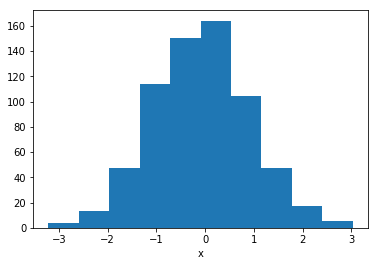

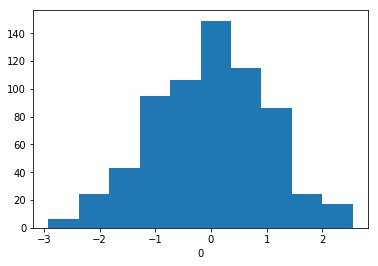

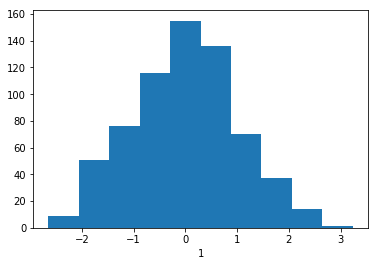

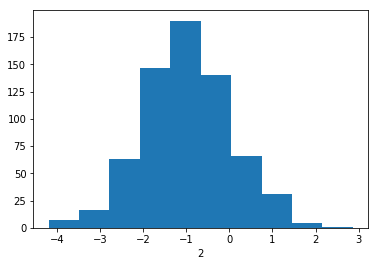

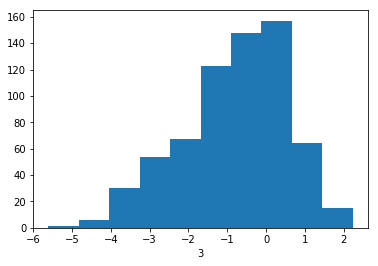

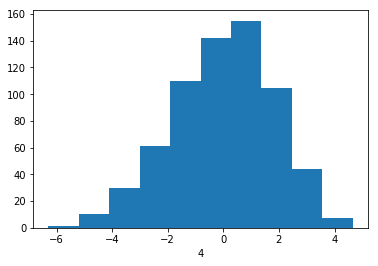

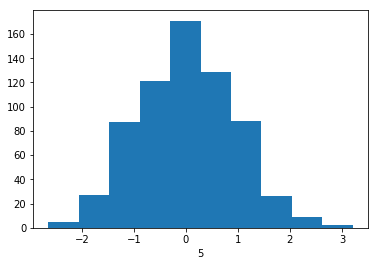

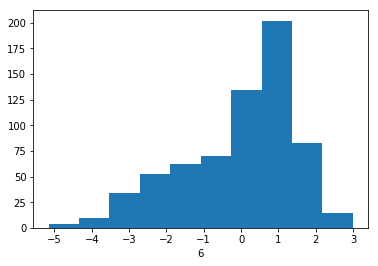

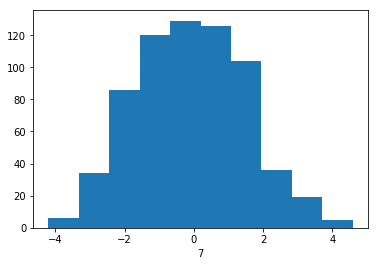

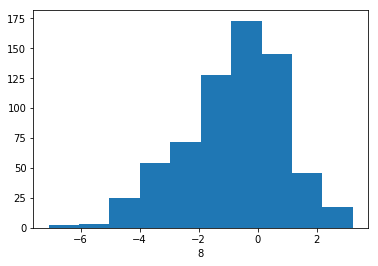

In [50]:
#class0
for i in class0.columns[:10]:
    plt.hist(class0[i])
    plt.xlabel(i)
    plt.show()

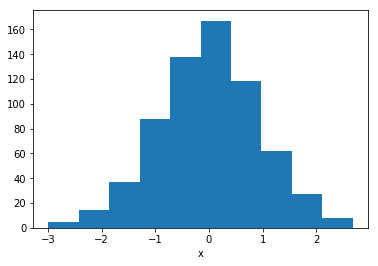

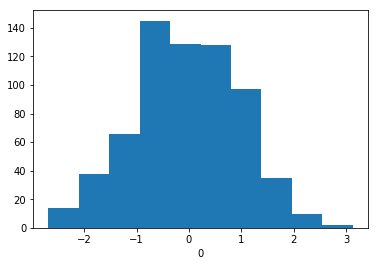

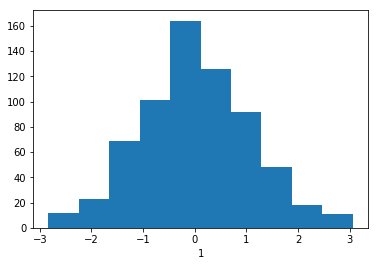

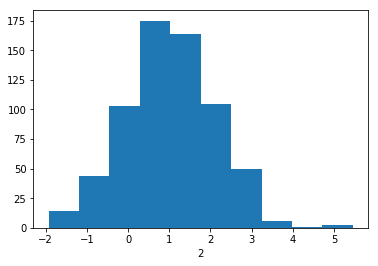

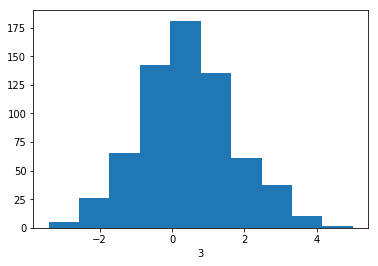

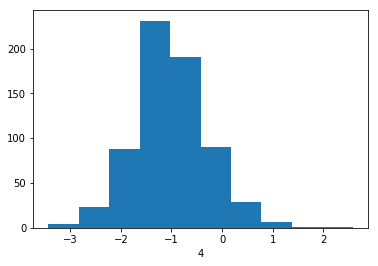

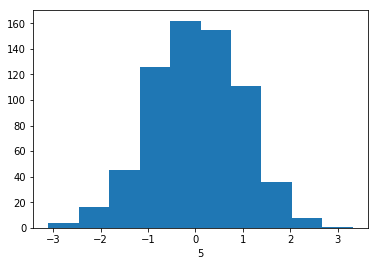

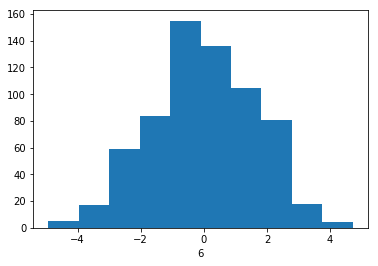

In [48]:
#class1
for i in class1.columns[:10]:
    plt.hist(class1[i])
    plt.xlabel(i)
    plt.show()

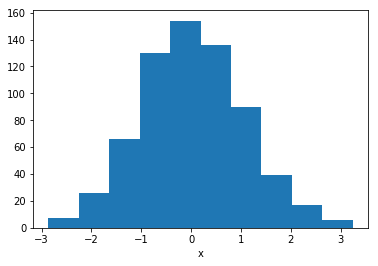

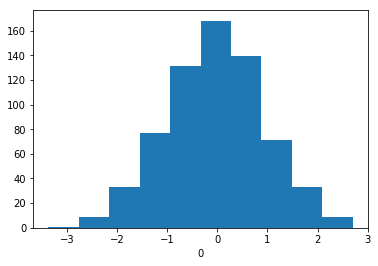

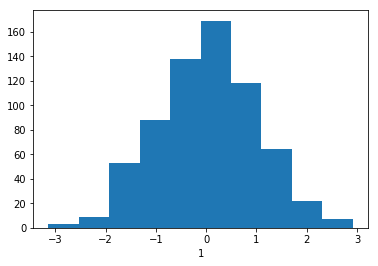

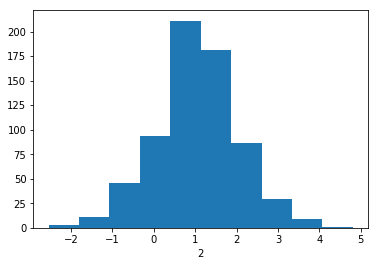

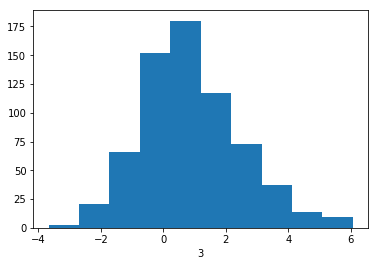

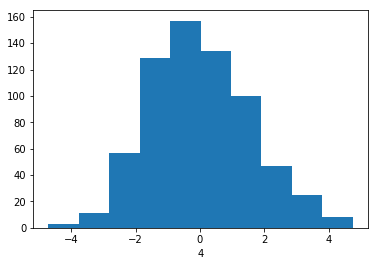

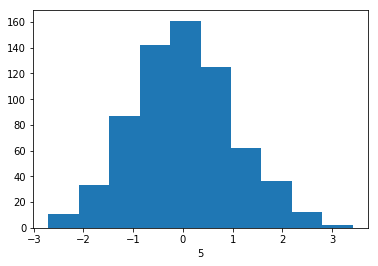

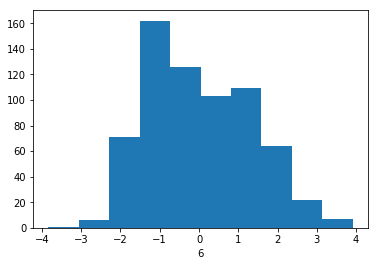

In [49]:
#class2
for i in class2.columns[:10]:
    plt.hist(class2[i])
    plt.xlabel(i)
    plt.show()

## Анализ мультикорреляции признаков

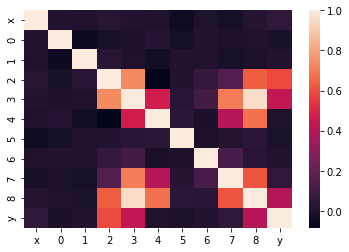

In [51]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

Сильно коррелируют (3, 8). Но в целом независимо сгенерированные случайные признаки слабо коррелируют друг с другом

## Список моделей

Здесь мы будем использовать Pipline, который сначала скейлит данные, а потом уже к отскейлинным данным применяет нужный классификатор

Метод ближайших соседей

In [4]:
knn = Pipeline([['scaler', StandardScaler()],
               ['knn', KNeighborsClassifier()]])

Логистическая регрессия

In [5]:
lr = Pipeline([['scaler', StandardScaler()],
               ['logreg', LogisticRegression()]])

SVM 

In [6]:
svm = Pipeline([['scaler', StandardScaler()],
                ['svm', SVC()]])

## Список метрик

ROC_AUC

In [7]:
from sklearn.metrics import roc_auc_score

F1 -score

In [8]:
from sklearn.metrics import f1_score

## Разбиение выборки на train и test

Разбиваем выборку на тренировочную и валидационную часть, оставляя на валидацую треть

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

## Подбор параметров для классификаторов на кросс-валидации для X_train

Для метода ближайших соседей подберём число ближайших соседей

In [11]:
knn_params = {'knn__n_neighbors': np.arange(5, 50)}
knn_gs = GridSearchCV(knn, knn_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42))

In [12]:
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[['scaler', StandardScaler(copy=True, with_mean=True, with_std=True)], ['knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')]]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'knn__n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [13]:
knn_gs.best_params_

{'knn__n_neighbors': 48}

In [14]:
knn_gs.cv_results_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([0.00115665, 0.00097028, 0.00097569, 0.00096703, 0.00094994,
        0.00096329, 0.00097068, 0.00097203, 0.00095789, 0.00096544,
        0.00095566, 0.00107876, 0.00097434, 0.00098109, 0.00097569,
        0.00097307, 0.00099095, 0.00097529, 0.00097966, 0.00098872,
        0.00099031, 0.0009807 , 0.00098403, 0.00098165, 0.00101471,
        0.00100501, 0.00098554, 0.00098268, 0.00099071, 0.00098848,
        0.00099651, 0.00099476, 0.00098729, 0.00100629, 0.00099277,
        0.00099166, 0.00098936, 0.00104698, 0.00099206, 0.00099699,
        0.00099174, 0.00098944, 0.00099134, 0.00099564, 0.00100334]),
 'mean_score_time': array([0.01225479, 0.01105698, 0.01113828, 0.01116832, 0.01126083,
        0.01140006, 0.01147779, 0.01159732, 0.0116117 , 0.01182294,
        0.01190972, 0.01216594, 0.01197378, 0.01220926, 0.01219622,
        0.0124704 , 0.01240126, 0.01247764, 0.01255433, 0.01276159,
        0.01280602, 0.01283026, 0.0128266 , 0.0129927 , 0.01319464,
        0.

На кросс-валидации качество очент даже неплохое. Оказалось, что лучшим параметром n_neighbors в данном случае является 48. Будем использовать эту модель для отбора признаков

In [19]:
from sklearn.feature_selection import SelectFromModel

In [20]:
knn_best = Pipeline([['scaler', StandardScaler()],
                     ['knn', KNeighborsClassifier(n_neighbors=48)]])

knn_select = Pipeline([['selector', SelectFromModel(knn_best, threshold=-np.inf)],
                       ['knn', knn_best]])

In [23]:
knn_select_params = {'selector__max_features': np.arange(1, 20)}
knn_select_gs = GridSearchCV(knn_select, knn_select_params, scoring='roc_auc',
                             cv=StratifiedKFold(n_splits=3, shuffle=True))